# Zad 04 - `Zadanie_PCA`

**Temat:** Analiza głównych składowych

 ## **Treść zadania**

Zadanie dotyczy obliczenia środka, osi głównych oraz kątu obrotu danych dwuwymiarowych z pliku .csv zgodnie z wariantem zadania.

**Wariant zadania: `14`**

![14.csv](14.csv)

### Kod Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. WCZYTANIE DANYCH Z PLIKU CSV

INPUT_CSV_PATH = "14.csv"

df = pd.read_csv(INPUT_CSV_PATH, header=None)

In [2]:
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0.131322,1.972256,1.429069,-0.266865,-0.469888,1.683262,2.401210,1.185304,0.927812,-0.522420,...,-1.015008,2.41119,2.133136,1.405037,1.830579,1.607316,0.972869,1.545754,1.134556,-1.074768
1,1.281232,0.858148,3.898987,3.755976,1.302653,3.154727,1.323284,4.381682,2.947674,1.787887,...,1.734867,1.40651,2.187422,1.726194,-0.341883,0.685741,2.696675,2.328257,2.163095,4.227209


In [12]:
X = df.values

nPoints = X.shape[1]  # liczba punktów

nPoints

10000

In [16]:
# 2. OBLICZENIE ŚRODKA (ŚREDNIEJ) I WYCENTROWANIE DANYCH

Xavg = np.mean(X, axis=1)  # średnia dla każdego wymiaru (2 elementy)
B = X - Xavg.reshape(-1, 1)  # odejmowanie średniej (wycentrowane dane)

# 3. OBLICZENIE PCA (PRZEZ SVD) – GŁÓWNE OSI I WARIANCJE

# SVD wycentrowanych danych (znormalizowanych przez sqrt(n) jak w PCA)
U, S, VT = np.linalg.svd(B / np.sqrt(nPoints), full_matrices=False)

# U – macierz wektorów własnych (główne osie)
# S – wartości osobliwe, powiązane z odchyleniami standardowymi
# Wariancje wzdłuż osi głównych: lambda_k = S[k]**2

# 4. OBLICZENIE KĄTA OBROTU GŁÓWNEJ OSI (PIERWSZEJ SKŁADOWEJ)

# Kąt (w radianach) między pierwszą osią główną a osią x:
theta = np.arctan2(U[1, 0], U[0, 0])  # U[:,0] to pierwsza składowa główna

# Konwersja na stopnie
theta_deg = np.degrees(theta)

print("=========================================")
print("WYNIKI ANALIZY PCA")
print("=========================================")
print(f"Środek danych (średnia): {Xavg}")
print(f"Kierunki głównych osi (macierz U):\n{U}")
print(f"Wartości osobliwe (S): {S}")
print(f"Wariancje wzdłuż osi głównych (lambda_k = S^2): {S**2}")
print(f"Kąt obrotu pierwszej osi głównej względem osi x: {theta:.4f} rad ({theta_deg:.2f}°)")
print("=========================================")

WYNIKI ANALIZY PCA
Środek danych (średnia): [1.00263266 2.00949782]
Kierunki głównych osi (macierz U):
[[-0.69107592  0.72278217]
 [ 0.72278217  0.69107592]]
Wartości osobliwe (S): [1.48927912 0.99856503]
Wariancje wzdłuż osi głównych (lambda_k = S^2): [2.21795231 0.99713212]
Kąt obrotu pierwszej osi głównej względem osi x: 2.3338 rad (133.72°)


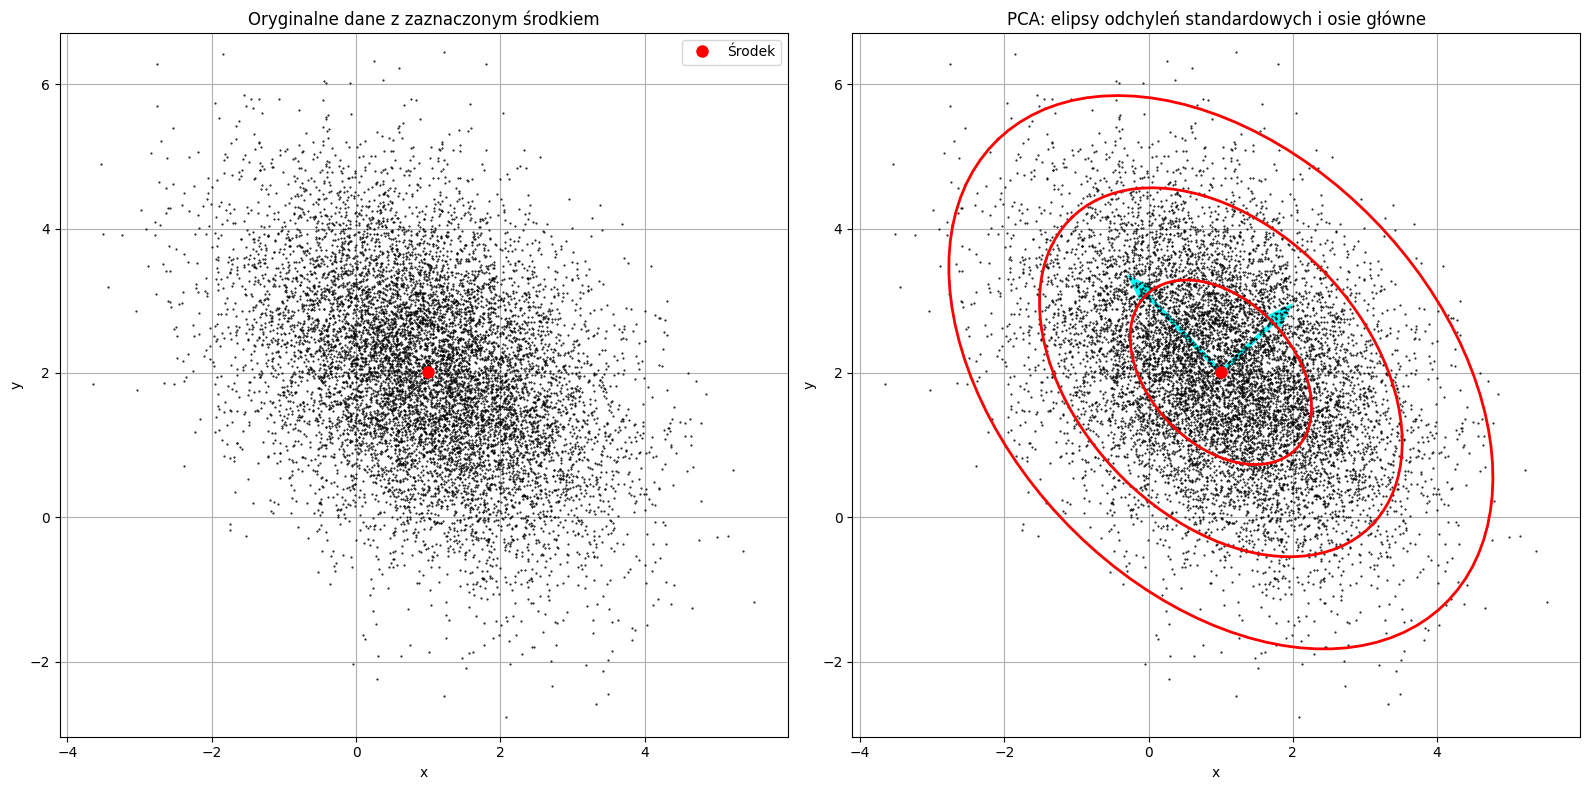

In [20]:
# 5. WIZUALIZACJA

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))

# oryginalne dane
ax1.plot(X[0, :], X[1, :], '.', color='k', markersize=1)
ax1.plot(Xavg[0], Xavg[1], 'ro', markersize=8, label='Środek')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Oryginalne dane z zaznaczonym środkiem')
ax1.grid(True)
ax1.legend()
ax1.axis('equal')

# dane z elipsami odchyleń i osiami głównymi
ax2.plot(X[0, :], X[1, :], '.', color='k', markersize=1)
ax2.plot(Xavg[0], Xavg[1], 'ro', markersize=8)

# Rysowanie elips odpowiadających 1, 2, 3 odchyleniom standardowym
theta_circle = np.linspace(0, 2 * np.pi, 100)
circle = np.vstack([np.cos(theta_circle), np.sin(theta_circle)])

for k in range(1, 4):
    ellipse = U @ np.diag(S * k) @ circle  # przeskalowane osie
    ax2.plot(Xavg[0] + ellipse[0, :], Xavg[1] + ellipse[1, :],
             '-', color='red', linewidth=2, label=f'{k}σ' if k==1 else "")

# Rysowanie osi głównych (wektorów własnych) przeskalowanych przez wartości osobliwe
for i in range(2):
    ax2.arrow(Xavg[0], Xavg[1],
              U[0, i] * S[i], U[1, i] * S[i],
              head_width=0.2, head_length=0.3, fc='cyan', ec='cyan', linewidth=3)

ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('PCA: elipsy odchyleń standardowych i osie główne')
ax2.grid(True)
ax2.axis('equal')

plt.tight_layout()
plt.show()